# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
from __future__ import absolute_import, division, print_function

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
662,8,167,106,46,231,37.6,0.165,43,1
324,2,112,75,32,0,35.7,0.148,21,0
494,3,80,0,0,0,0.0,0.174,22,0
278,5,114,74,0,0,24.9,0.744,57,0
353,1,90,62,12,43,27.2,0.580,24,0


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:


model_1 = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 16ms/step - loss: 0.7618 - accuracy: 0.5295 - val_loss: 0.7875 - val_accuracy: 0.5104
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7237 - accuracy: 0.5712 - val_loss: 0.7504 - val_accuracy: 0.5781
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.6024 - val_loss: 0.7210 - val_accuracy: 0.5938
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6702 - accuracy: 0.6181 - val_loss: 0.6973 - val_accuracy: 0.5990
Epoch 5/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6181 - val_loss: 0.6781 - val_accuracy: 0.5938
Epoch 6/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6343 - accuracy: 0.6215 - val_loss: 0.6620 - val_accuracy: 0.6146
Epoch 7/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6203 - accuracy: 0.6285 - val_loss: 0.6484 - val_accuracy: 0.6250
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model_1.predict(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0.65582037],
       [0.6507114 ],
       [0.32304847],
       [0.21720952],
       [0.1633364 ],
       [0.4551786 ],
       [0.02752979],
       [0.38203385],
       [0.89780146],
       [0.17257361]], dtype=float32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.65582037],
       [0.6507114 ],
       [0.32304847],
       [0.21720952],
       [0.1633364 ],
       [0.4551786 ],
       [0.02752979],
       [0.38203385],
       [0.89780146],
       [0.17257361]], dtype=float32)

Create the plot_roc function

In [ ]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

In [ ]:
y_pred_class_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.760
roc-auc is 0.818


accuracy is 0.760
roc-auc is 0.818


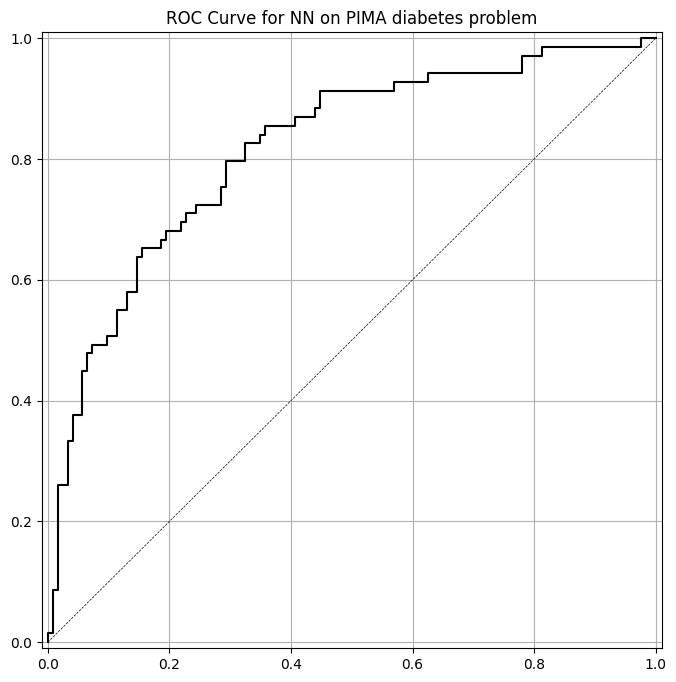

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

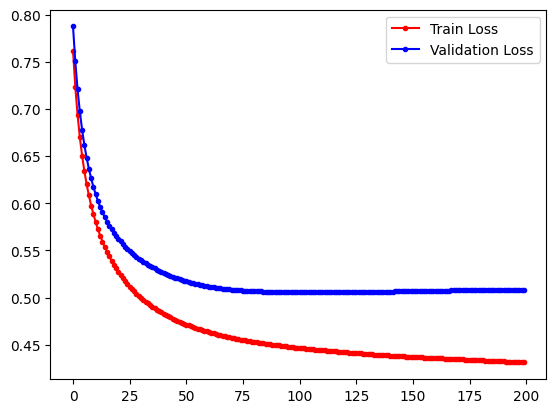

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

#type your answer here

My interpretation on the results of train and validation loss is that the model should have further training, thus adding more epoch may result into better or worse. Also, the results shows it is underfitting since the both losses is high creating wider gap each epoch.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
#Build a model with two hidden layers, each with 6 nodes
#Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
model_supple = Sequential([
    Dense(6, input_shape=(8,), activation="sigmoid"),
    Dense(2, activation="relu")
])

In [ ]:
model_supple.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 2)                 14        
                                                                 
Total params: 68 (272.00 Byte)
Trainable params: 68 (272.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_supple.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_supple.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 13ms/step - loss: 6.6705 - accuracy: 0.6545 - val_loss: 6.5424 - val_accuracy: 0.6406
Epoch 2/1500
18/18 [==============================] - 0s 4ms/step - loss: 6.0002 - accuracy: 0.6545 - val_loss: 5.4796 - val_accuracy: 0.6406
Epoch 3/1500
18/18 [==============================] - 0s 4ms/step - loss: 5.5249 - accuracy: 0.6528 - val_loss: 3.5747 - val_accuracy: 0.6406
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 3.2684 - accuracy: 0.6545 - val_loss: 3.3410 - val_accuracy: 0.6406
Epoch 5/1500
18/18 [==============================] - 0s 4ms/step - loss: 3.2098 - accuracy: 0.6545 - val_loss: 3.4664 - val_accuracy: 0.6406
Epoch 6/1500
18/18 [==============================] - 0s 5ms/step - loss: 3.0724 - accuracy: 0.6545 - val_loss: 3.1567 - val_accuracy: 0.6406
Epoch 7/1500
18/18 [==============================] - 0s 5ms/step - loss: 3.0379 - accuracy: 0.6545 - val_loss: 3.1418 - val_accuracy: 0.6406
Epoch

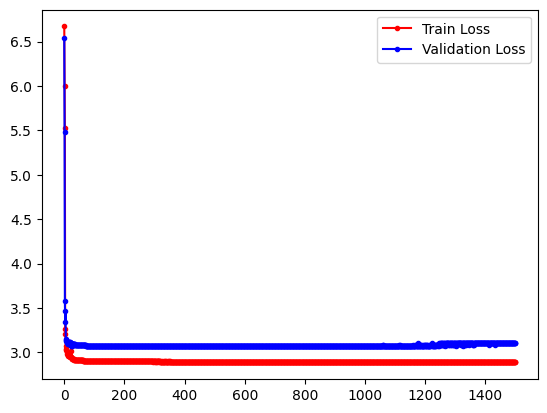

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

- Interpret results
The results shows in the graph that the model is underfitting since the gap between the two losses are high. It shows that under 200 epoch the model are good fit indicating that having 200 epoch is enough.

accuracy is 0.760
roc-auc is 0.818


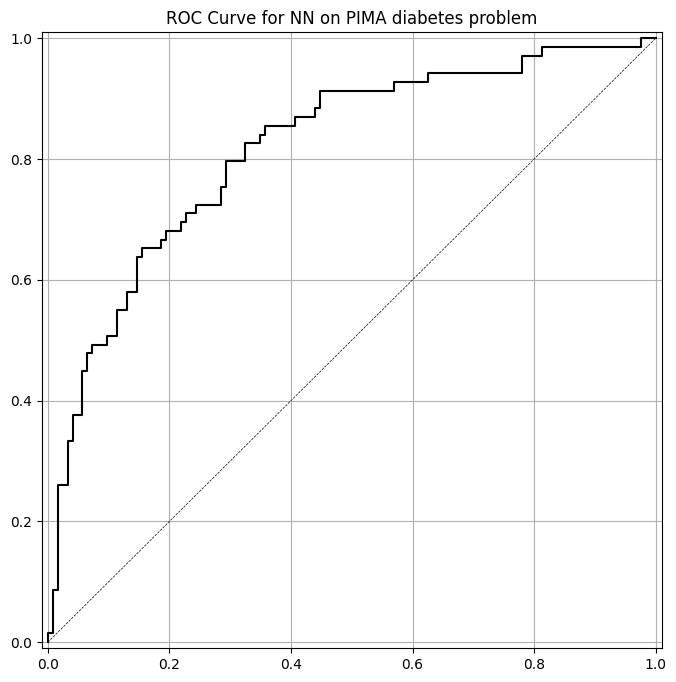

In [ ]:
#Plot the roc curve for the predictions
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

In [ ]:
#Use different learning rates, numbers of epochs, and network structures.
model_2 = Sequential([
    Dense(10, input_shape=(8,), activation="tanh"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                90        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Plot the results of training and validation loss using different learning rates, number of epochs and network structures
model_2.compile(SGD(lr = .005), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)

Epoch 1/500
18/18 [==============================] - 1s 13ms/step - loss: 0.6533 - accuracy: 0.6319 - val_loss: 0.6636 - val_accuracy: 0.6406
Epoch 2/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6307 - accuracy: 0.6806 - val_loss: 0.6425 - val_accuracy: 0.6510
Epoch 3/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6120 - accuracy: 0.7101 - val_loss: 0.6248 - val_accuracy: 0.6979
Epoch 4/500
18/18 [==============================] - 0s 5ms/step - loss: 0.5962 - accuracy: 0.7222 - val_loss: 0.6100 - val_accuracy: 0.6979
Epoch 5/500
18/18 [==============================] - 0s 4ms/step - loss: 0.5831 - accuracy: 0.7361 - val_loss: 0.5975 - val_accuracy: 0.7135
Epoch 6/500
18/18 [==============================] - 0s 4ms/step - loss: 0.5716 - accuracy: 0.7344 - val_loss: 0.5868 - val_accuracy: 0.7188
Epoch 7/500
18/18 [==============================] - 0s 4ms/step - loss: 0.5618 - accuracy: 0.7413 - val_loss: 0.5775 - val_accuracy: 0.7135
Epoch 8/500


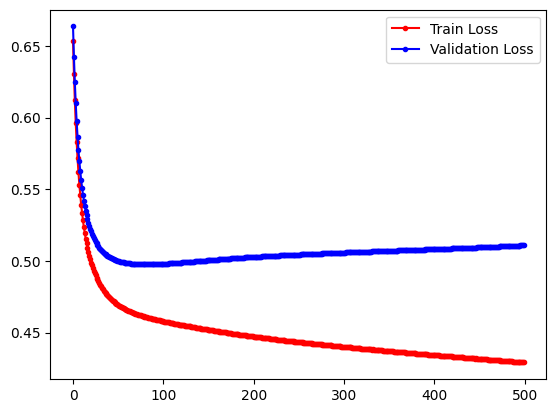

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

- Interpret your result

It shows that the experimented one is good fit since both are stabilizing as the epoch gets higher. The results shows stablization as the epoch gets further.

#### Conclusion

To conclude, this activity help me understand on how to train neural networks and how to apply it into deep learning and how to use it in models. Although I experienced some errors, I still tried to solve it and I think I solved it somehow and as the time goes by and everytime I tried to fix the errors I realized what this hands-on activity for and how this works. Lastly, this activity help me to have a better idea how cool deep learning is and how important it is.